In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('Iris.csv')
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [3]:
np.size(y)

150

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.shape(y_train)

(100,)

In [5]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Accuracy of kNN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of kNN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of kNN classifier on training set: 0.97
Accuracy of kNN classifier on test set: 0.98


confusion_matrix:
 [[16  0  0]
 [ 0 18  1]
 [ 0  0 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.95      0.97        19
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



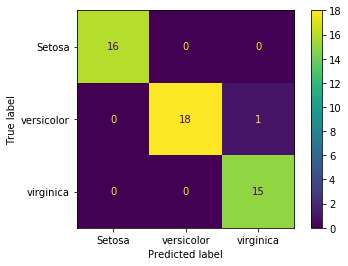

In [7]:
pred = knn.predict(x_test)
confusionmat=metrics.confusion_matrix(y_test, pred)

print('confusion_matrix:\n',confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionmat, display_labels = ["Setosa", "versicolor","virginica"])
cm_display.plot()
plt.show()

## Cross validation

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


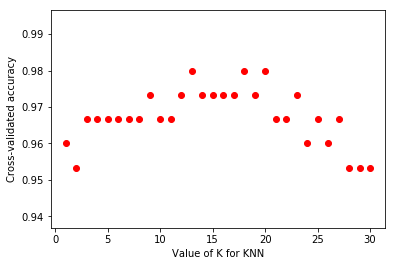

In [11]:

from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN

# range of k we want to try
krange=range(1, 31)
# empty list to store scores
k_scores = []

# 1. loop through reasonable values of k
for k in krange:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    # score: Returns the mean accuracy on the given test data and labels.
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    #print('scores',scores)
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)
plt.scatter(krange, k_scores,color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.savefig (r'C:\HTD\figs\cv_knn.png')

## Naive Bayes


In [10]:
df = pd.read_csv('diabetes.txt', sep=',')#delimiter='\t')
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [11]:
df["diabetes"].value_counts()

1    498
0    497
Name: diabetes, dtype: int64

In [12]:
#plt.hist(df["diabetes"], bins=10, color='blue', edgecolor='black');

In [3]:
# import plotly.express as px
# fig = px.scatter(df, x='glucose', y='bloodpressure',color='diabetes')
# fig.show()

In [14]:
x = df.drop('diabetes',axis=1)
y = df['diabetes']
x

,glucose,bloodpressure
0,40,85
1,40,92
2,45,63
3,45,80
4,40,73
...,...,...
990,45,87
991,40,83
992,40,83
993,40,60


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.shape(y_train)

(696,)

In [16]:
y_train.value_counts()

0    366
1    330
Name: diabetes, dtype: int64

In [31]:
## Standarization (mean zero and standard deviation 1) to be able to compare models

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(x_train, y_train)
pred=gnb.predict(x_test)

confusion_matrix:
 [[122   9]
 [ 13 155]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       131
           1       0.95      0.92      0.93       168

    accuracy                           0.93       299
   macro avg       0.92      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



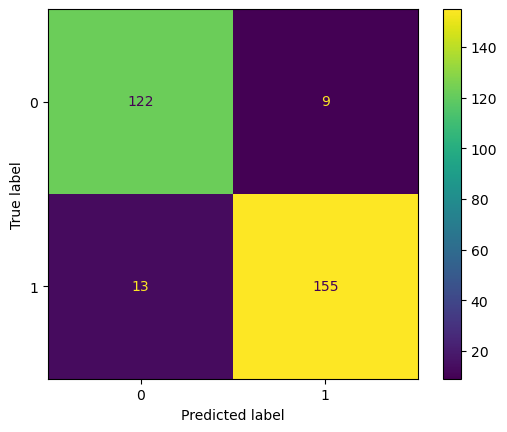

In [19]:
confusionmat=metrics.confusion_matrix(y_test, pred)
print('confusion_matrix:\n',confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionmat, display_labels = ["0", "1"])
cm_display.plot()
plt.show()

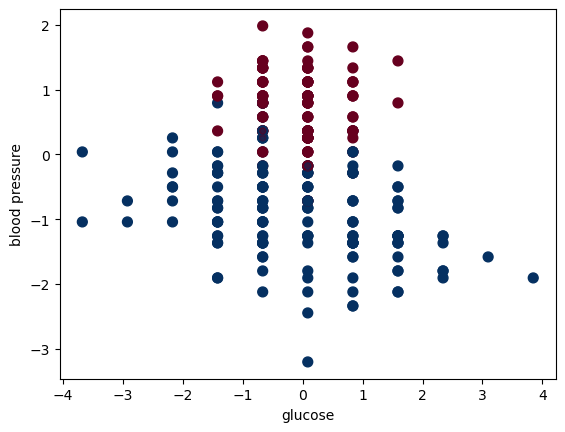

In [27]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='RdBu');
plt.scatter(x_test[:, 0], x_test[:, 1], c=pred, s=20, cmap='RdBu', alpha=0.1);
plt.xlabel("glucose");
plt.ylabel("blood pressure");

## Logistic regression

confusion_matrix:
 [[122   9]
 [ 15 153]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       131
           1       0.94      0.91      0.93       168

    accuracy                           0.92       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.92      0.92      0.92       299



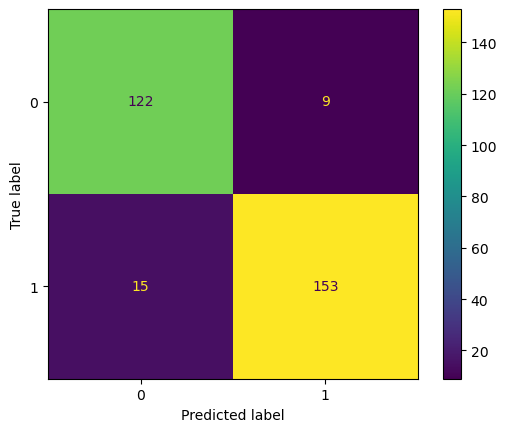

In [28]:
from sklearn.linear_model import LogisticRegression
# El logisticRegression por defecto usa metodos regularizadas 
clr=LogisticRegression(solver='newton-cg',penalty = 'none',max_iter = 150,random_state=0).fit(x_train, y_train)
# C determines regularization strength. It's default value is 1
#clr=LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x_train, y_train)

pred=clr.predict(x_test)

confusionmat=metrics.confusion_matrix(y_test, pred)
print('confusion_matrix:\n',confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionmat, display_labels = ["0", "1"])
cm_display.plot()
plt.show()

In [29]:
clr.coef_

array([[-0.66826261, -5.3357646 ]])

In [30]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
#result=logit_model.fit()
result=logit_model.fit_regularized()
print(result.summary2())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1778420612904928
            Iterations: 18
            Function evaluations: 18
            Gradient evaluations: 18
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.743      
Dependent Variable: diabetes         AIC:              251.5561   
Date:               2023-11-14 13:07 BIC:              260.6468   
No. Observations:   696              Log-Likelihood:   -123.78    
Df Model:           1                LL-Null:          -481.50    
Df Residuals:       694              LLR p-value:      1.3117e-157
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     18.0000                                       
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1 

In [31]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
#result=logit_model.fit_regularized()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.177842
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.743      
Dependent Variable: diabetes         AIC:              251.5561   
Date:               2023-11-14 13:07 BIC:              260.6468   
No. Observations:   696              Log-Likelihood:   -123.78    
Df Model:           1                LL-Null:          -481.50    
Df Residuals:       694              LLR p-value:      1.3117e-157
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1    -0.6697      0.1710     -3.9167    0.0001    -1.0048    -0.3346
x2    -5.3222      0.4565    -11.6585    

## Handwritten data

<Figure size 640x480 with 0 Axes>

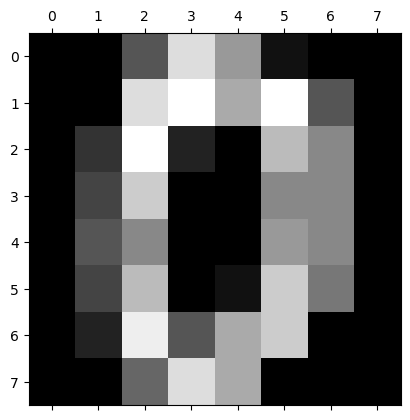

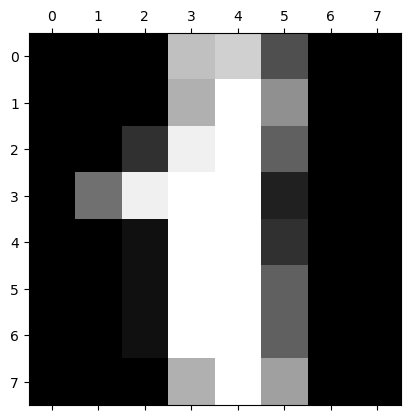

In [32]:
from sklearn.datasets import load_digits
#x, y = load_digits(return_X_y=True)
digits= load_digits()
#print('x',x)
#print('y',y)
plt.gray()
plt.matshow(digits.images[0])
plt.matshow(digits.images[1])
plt.show()

In [34]:
from sklearn.datasets import load_digits
x, y = load_digits(return_X_y=True)
print('x',x)
print('y',y)

x [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y [0 1 2 ... 8 9 8]


In [35]:
np.shape(x)

(1797, 64)

In [36]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=0)
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test= scaler.transform(x_test)

In [39]:
#model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
# C determines the strength of penalty
#large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more
model = LogisticRegression(solver='newton-cg', C=0.05, multi_class='multinomial', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='multinomial', random_state=0,
                   solver='newton-cg')

In [40]:
pred = model.predict(x_test)
pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 4,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 9, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 8, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [41]:
model.score(x_test, y_test)

0.9629629629629629

In [11]:
coefs=model.coef_
np.shape(coefs)

(10, 64)

## Multinomial classification with penalty

In [43]:
## Multinomial logistic classification with penalty
# The weighting for penalty is 1-C: this means that values close to 1.0 indicate very little penalty 
#and values close to zero indicate a strong penalty. C=1.0 indicates no penalty.
model_l2=LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2', C=0.01)
model_l2.fit(x_train, y_train)
pred_l2 = model_l2.predict(x_test)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate the model and collect the scores
# n_scores_l2 = cross_val_score(model_l2, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report the model performance
# print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores_l2), np.std(n_scores_l2)))

confusion_matrix:
 [[45  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  1  0  3  0]
 [ 0  1 52  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 54  1  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  1  2  0  0 50  0  0]
 [ 0  2  1  0  0  0  0  0 56  2]
 [ 0  0  0  0  0  1  0  0  0 56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.92      0.92      0.92        52
           2       0.98      0.98      0.98        53
           3       0.98      0.98      0.98        54
           4       0.96      0.98      0.97        48
           5       0.98      0.95      0.96        57
           6       0.97      0.98      0.98        60
           7       0.98      0.94      0.96        53
           8       0.93      0.92      0.93        61
           9       0.93      0.98      0.96        57

    accuracy                           0.96       540


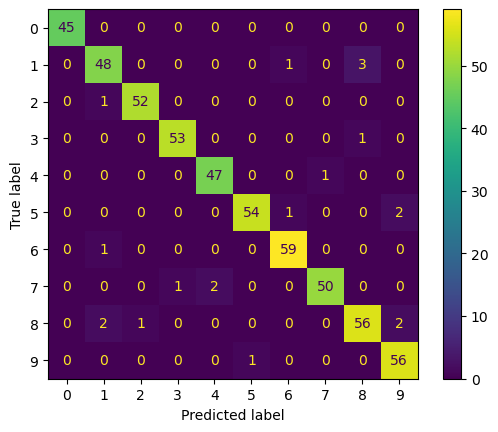

In [44]:
confusionmat=metrics.confusion_matrix(y_test, pred)
print('confusion_matrix:\n',confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionmat)
cm_display.plot()
plt.show()

In [66]:
# Didn't run
# logit_model=sm.MNLogit(y_train,x_train)
# #result=logit_model.fit()
# result=logit_model.fit_regularized()
# print(result.summary2())

## Spam

In [46]:
# url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
#     + 'Estadistica-machine-learning-python/master/data/spam.csv'
# datos = pd.read_csv(url)

In [3]:
#datos.to_csv('spam_data.csv', index=False)

In [47]:
df = pd.read_csv('spam_data.csv')

In [48]:
df.head(3)

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam


In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
datos['type']=le.fit_transform(datos['type'])

In [51]:
#Numero de observaciones por clase
datos['type'].value_counts()

0    2788
1    1813
Name: type, dtype: int64

In [53]:
#Porcentaje de observaciones por clase
datos['type'].value_counts(normalize=True)

0    0.605955
1    0.394045
Name: type, dtype: float64

In [54]:
# codificar la variable respuesta como 1 si es spam y 0 si no lo es
#identificar cuantas observaciones hay de cada clase
#datos['type'] = np.where(datos['type'] == 'spam', 1, 0)

# datos['type'] = pd.get_dummies(datos['type'])#.values[:,0]
# print(np.shape(datos['type']))
# print("Numero de observaciones por clase")
# print(datos['type'].value_counts())
# print("")

# print("Porcentaje de observaciones por clase")
# print(datos['type'].value_counts(normalize=True))

In [61]:
X = datos.drop(columns = 'type')
y = datos['type']
print('y',y)
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size = 0.8, random_state = 1234, shuffle = True)
np.shape(X_train)

y 0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: type, Length: 4601, dtype: int32


(3680, 57)

C:\Users\Hossein\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion_matrix:
 [[534  29]
 [ 36 322]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       563
           1       0.92      0.90      0.91       358

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



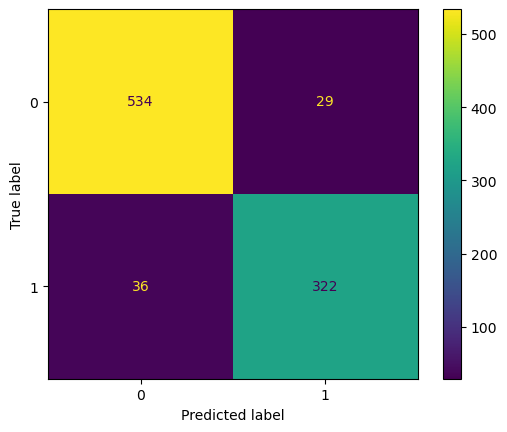

In [63]:
#clr=LogisticRegression(solver='newton-cg',penalty = 'none',max_iter = 1000,random_state=0).fit(X_train, y_train)
# C determines regularization strength. It's default value is 1
#clr=LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x_train, y_train)
clr=LogisticRegression(solver='liblinear',penalty = 'l2',max_iter = 1000,random_state=0).fit(X_train, y_train)

pred=clr.predict(X_test)

confusionmat=metrics.confusion_matrix(y_test, pred)
print('confusion_matrix:\n',confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionmat, display_labels = ["0", "1"])
cm_display.plot()
plt.show()

In [56]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
import statsmodels.api as sm
X_train = sm.add_constant(X_train, prepend=True)
print(np.shape(X_train))
modelo = sm.Logit(y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

(3680, 58)
Optimization terminated successfully.
         Current function value: 0.200751
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3680
Model:                          Logit   Df Residuals:                     3622
Method:                           MLE   Df Model:                           57
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                  0.7009
Time:                        13:20:13   Log-Likelihood:                -738.76
converged:                       True   LL-Null:                       -2469.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5530      0.156     -9.956      0.000      -1.859      -1.

In [57]:
# Predicciones con intervalo de confianza 
# since modelo is trained using logit, it has to contain an extra column of 1s. preds are probabilities. It has to be converted to 0,1
pred = modelo.predict(X_train)
print('predicciones',pred)
# Clasificación predicha
clas = np.where(pred<0.5, 0, 1)
clas

predicciones 1416    1.285612e-02
4451    1.784013e-06
3701    1.091433e-05
1962    2.203098e-17
874     5.861086e-01
            ...     
664     9.738552e-01
3276    9.996900e-01
1318    9.708403e-01
723     9.999879e-01
2863    1.300151e-06
Length: 3680, dtype: float64


array([0, 0, 0, ..., 1, 1, 0])

## adult data

In [3]:
# income is the target variable
df = pd.read_csv('adult_data.csv')#,header=None, sep=',\s')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [5]:
# check missing values in categorical variables
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [10]:
for var in categorical:
    print('*******************')
    print('var:',var)
    print(df[var].value_counts())

*******************
var: workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
*******************
var: education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
*******************
var: marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse         

In [11]:
# check labels in workclass variable

df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [17]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
# replace '?' values in workclass variable with `NaN`

df['workclass'].replace('?', 'NAN', inplace=True)


In [29]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [30]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [70]:
#df.replace('?', np.NAN, inplace=True)
#df.replace(['?'], np.NAN)
df.replace(to_replace="?", value='None')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [57]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(x_train, y_train)

In [31]:
X = df.drop(['income'], axis=1)
y = df['income']
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [ ]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

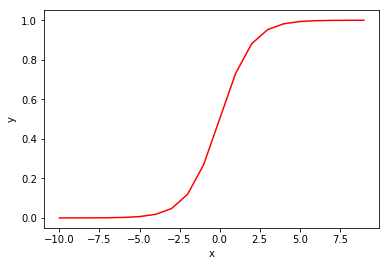

In [63]:
def sigmoid(x):
    y=1/(1+np.exp(-x))
    return y
xrange=range(-10,10)
sigfun=np.zeros(len(xrange))
y=np.zeros(len(xrange))
ylin=np.zeros(len(xrange))
i=0

for x in xrange:
    ylin[i]=0.5*x
    if x<0:
        y[i]=0
    else:
        y[i]=1
    sigfun[i]=sigmoid(x)
    i=i+1
#print(sigfun)

#print(0.5*xrange)
plt.figure()
plt.plot(xrange,sigfun,color='red')
#plt.scatter(xrange,y,color='black')
#plt.plot(xrange,ylin,color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.savefig (r'C:\HTD\figs\sigmoid.png')

20